# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
# save config information.
url ="http://api.openweathermap.org/data/2.5/weather?"
units="metrics"

In [4]:
new_city=[]
lat=[]         
lng=[]           
max_temp=[]    
humidity =[]     
cloudiness =[] 
wind_speed =[]   
country =[]      
date  =[]     

query_url=(f"{url}appid={weather_api_key}&units={units}&q=")
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=36d27378545f7daafa9d3ff4e9ef2e7a&units=metrics&q='

In [5]:
print(f"Beginning Data Retrieval")
print(f"------------------------")

for city in cities:
    try:
        #time.sleep(1)

        response=requests.get(query_url +city)
        json_response=response.json()
        #print(json.dumps(json_response, indent=4, sort_keys=True))
        new_city.append(json_response["name"])
        lat.append(json_response["coord"]["lat"])
        lng.append(json_response["coord"]["lon"])
        max_temp.append(json_response["main"]["temp_max"])
        humidity.append(json_response["main"]["humidity"])
        cloudiness.append(json_response["clouds"]["all"])
        wind_speed.append(json_response["wind"]["speed"])
        country.append(json_response["sys"]["country"])
        date.append(json_response["dt"])
        print(f"Processing {city}")
    except KeyError:
        print("Another one!")
print(f"-------------------------------")
print(f"Ending Data Retrieval")

Beginning Data Retrieval
------------------------
Processing albany
Processing butaritari
Processing busselton
Processing tuktoyaktuk
Processing bredasdorp
Processing qaanaaq
Processing taoudenni
Processing porto san giorgio
Another one!
Processing kodiak
Processing kingisepp
Processing umm lajj
Processing mount gambier
Another one!
Processing hobart
Processing punta arenas
Processing ushuaia
Processing folkestone
Processing provideniya
Processing hermanus
Processing samana
Processing gimli
Processing constitucion
Processing hamilton
Another one!
Processing kuryk
Processing ponta delgada
Processing rikitea
Processing hilo
Processing vaini
Processing saint george
Processing cape town
Another one!
Processing leningradskiy
Another one!
Processing faanui
Processing manzhouli
Processing georgetown
Processing port alfred
Processing khatanga
Processing kapaa
Processing barrow
Processing cabo san lucas
Processing chuy
Processing kawalu
Processing tasiilaq
Processing avarua
Processing fernley
P

Processing saint-felix-de-valois
Processing lago da pedra
Processing atagay
Processing kapoeta
Another one!
Processing awbari
Processing tiarei
Processing avera
Another one!
Processing capoterra
Processing ambon
Processing laiyang
Processing sisimiut
Processing hwange
Processing gobabis
Processing jiblah
Processing laguna
Processing kasongo-lunda
Processing padang
Processing peniche
Processing aklavik
Processing boyolangu
Processing esperance
Processing alyangula
Processing aykhal
Processing isangel
Processing mehkar
Another one!
Another one!
Processing gravdal
Processing san luis
Processing boromo
Processing kalat
Processing rujewa
Processing sicuani
Processing belmopan
Processing elizabeth city
Processing vigia del fuerte
Processing vestmannaeyjar
Processing san juan del sur
Processing marsa matruh
Processing kachug
Processing dehui
Processing morehead
Processing tagusao
Processing acapulco
Processing meulaboh
Processing jiayuguan
Processing itarema
Processing norman wells
Processing

In [24]:
new_weather_df=pd.DataFrame({"City":new_city,
                           "Lat":lat,
                           "Lng":lng,
                           "Max Temp":max_temp,
                           "Humidity":humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Date":date})
new_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,302.59,44,13,0.67,US,1596920589
1,Butaritari,3.07,172.79,301.65,79,39,8.18,KI,1596920590
2,Busselton,-33.65,115.33,285.93,78,100,6.71,AU,1596920590
3,Tuktoyaktuk,69.45,-133.04,283.15,100,90,10.30,CA,1596920590
4,Bredasdorp,-34.53,20.04,288.15,41,18,3.10,ZA,1596920590


In [7]:
new_weather_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [25]:
new_weather_df.to_csv("../output_data/weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
new_weather2_df=new_weather_df.loc[new_weather_df["Humidity"]<=100]
new_weather2_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,302.59,44,13,0.67,US,1596920589
1,Butaritari,3.07,172.79,301.65,79,39,8.18,KI,1596920590
2,Busselton,-33.65,115.33,285.93,78,100,6.71,AU,1596920590
3,Tuktoyaktuk,69.45,-133.04,283.15,100,90,10.30,CA,1596920590
4,Bredasdorp,-34.53,20.04,288.15,41,18,3.10,ZA,1596920590
...,...,...,...,...,...,...,...,...,...
544,The Valley,18.22,-63.06,304.15,74,40,6.70,AI,1596920587
545,Derzhavīnsk,51.10,66.32,293.47,66,28,6.89,KZ,1596920645
546,Oyama,36.30,139.80,300.37,94,75,1.50,JP,1596920645
547,Charleston,32.78,-79.93,306.15,70,1,4.10,US,1596920645


In [27]:
new_weather2_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,5.490000e+02
mean,20.404281,21.648962,294.128306,71.12204,51.728597,3.558124,1.596921e+09
std,33.670507,91.047674,7.721481,21.14707,39.725577,2.414661,6.504734e+01
min,-54.800000,-175.200000,274.820000,3.00000,0.000000,0.130000,1.596920e+09
25%,-7.740000,-62.270000,287.940000,62.00000,6.000000,1.510000,1.596921e+09
50%,25.020000,25.570000,295.150000,77.00000,56.000000,3.100000,1.596921e+09
75%,49.000000,103.400000,300.070000,87.00000,91.000000,4.960000,1.596921e+09
max,78.220000,178.420000,314.960000,100.00000,100.000000,12.900000,1.596921e+09


In [28]:
#  Get the indices of cities that have humidity over 100%.
cities_indicies=new_weather_df.loc[new_weather_df["Humidity"]>100].index
cities_indicies


Int64Index([], dtype='int64')

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_indexes=new_weather_df.loc[(new_weather_df["Humidity"]<humidity_lower_bound) & (new_weather_df["Humidity"]>humidity_upper_bound)].index
outliers_indexes



clean_city_data = new_weather_df.drop(outliers_indexes, inplace=False)
fresh_data=clean_city_data.sort_values("Humidity", ascending=False)
fresh_data


24.5 and 124.5 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
70,Denpasar,-8.65,115.22,297.15,100,40,1.00,ID,1596920387
536,Batemans Bay,-35.72,150.18,285.93,100,100,0.45,AU,1596920644
296,Petropavlovsk-Kamchatskiy,53.05,158.65,284.15,100,75,3.00,RU,1596920622
3,Tuktoyaktuk,69.45,-133.04,283.15,100,90,10.30,CA,1596920590
461,Béoumi,7.67,-5.58,296.15,100,20,3.10,CI,1596920353
...,...,...,...,...,...,...,...,...,...
479,Mikasa,43.25,141.90,293.71,7,2,2.24,JP,1596920639
27,Saint George,37.10,-113.58,310.93,6,1,2.60,US,1596920593
260,Calama,-22.47,-68.93,295.15,5,0,8.70,CL,1596920618
381,Saint-Felix-de-Valois,46.17,-73.43,302.04,5,0,3.34,CA,1596920630


In [31]:
#This is my own method and it's working 

humidity_out=new_weather_df["Humidity"]
humidity_out
quartiles= humidity_out.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
#Determine the outlier using the upper and lower bound
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

new_day_df=new_weather_df.loc[(new_weather_df["Humidity"]>humidity_lower_bound) & (new_weather_df["Humidity"]<humidity_upper_bound)]
new_day_df=new_day_df.sort_values("Humidity",ascending=False)
new_day_df

24.5 and 124.5 are the outliers


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
259,NEDJO,9.50,35.50,287.54,100,99,1.04,ET,1596920618
536,Batemans Bay,-35.72,150.18,285.93,100,100,0.45,AU,1596920644
211,Manali,13.17,80.27,298.15,100,90,6.20,IN,1596920613
3,Tuktoyaktuk,69.45,-133.04,283.15,100,90,10.30,CA,1596920590
454,Hasaki,35.73,140.83,297.04,100,75,2.10,JP,1596920637
...,...,...,...,...,...,...,...,...,...
512,Jardim,-21.48,-56.14,300.41,26,0,0.72,BR,1596920642
348,Mehrān,33.12,46.16,300.15,26,0,1.00,IR,1596920627
411,Sicuani,-14.27,-71.23,290.26,25,0,5.66,PE,1596920633
504,Boyuibe,-20.42,-63.28,301.45,25,0,4.37,BO,1596920641


In [34]:
# Extract relevant fields from the data frame
extract_data=new_day_df[["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
extract_data


,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
259,9.50,287.54,100,99,1.04
536,-35.72,285.93,100,100,0.45
211,13.17,298.15,100,90,6.20
3,69.45,283.15,100,90,10.30
454,35.73,297.04,100,75,2.10
...,...,...,...,...,...
512,-21.48,300.41,26,0,0.72
348,33.12,300.15,26,0,1.00
411,-14.27,290.26,25,0,5.66
504,-20.42,301.45,25,0,4.37


In [35]:
# Export the City_Data into a csv
extract_data.to_csv("../output_data/extra.csv",index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

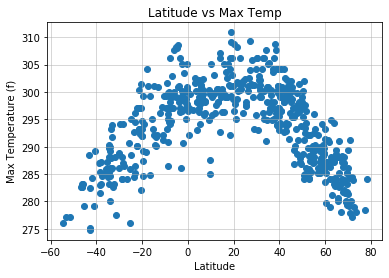

In [36]:
plt.scatter(extract_data['Lat'],extract_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.title("Latitude vs Max Temp")

#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Max Temp.png")

plt.show()

## Latitude vs. Humidity Plot

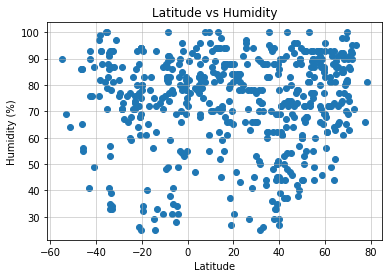

In [37]:
plt.scatter(extract_data['Lat'],extract_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

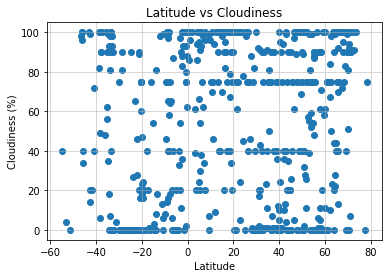

In [38]:
plt.scatter(extract_data['Lat'],extract_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs Cloudiness")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

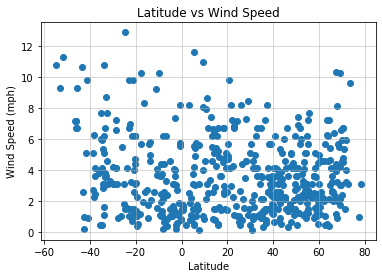

In [39]:
plt.scatter(extract_data['Lat'],extract_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs Wind Speed")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Wind Speed.png")

plt.show()

## Linear Regression

In [70]:
northern_hemisphere=extract_data.loc[extract_data["Lat"]>=0]
northern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
259,9.50,287.54,100,99,1.04
211,13.17,298.15,100,90,6.20
3,69.45,283.15,100,90,10.30
454,35.73,297.04,100,75,2.10
461,7.67,296.15,100,20,3.10
...,...,...,...,...,...
465,39.74,293.81,29,0,1.81
424,39.82,293.14,27,10,1.13
116,18.90,310.90,27,34,4.76
348,33.12,300.15,26,0,1.00


In [69]:
southern_hemisphere=extract_data.loc[clean_city_data["Lat"]<0]
southern_hemisphere

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
536,-35.72,285.93,100,100,0.45
130,-35.35,285.93,100,90,7.70
70,-8.65,297.15,100,40,1.00
548,-38.33,281.48,99,49,2.24
460,-38.55,285.37,97,100,2.68
...,...,...,...,...,...
257,-14.74,301.09,29,0,0.86
68,-5.13,308.15,28,0,1.50
512,-21.48,300.41,26,0,0.72
411,-14.27,290.26,25,0,5.66


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

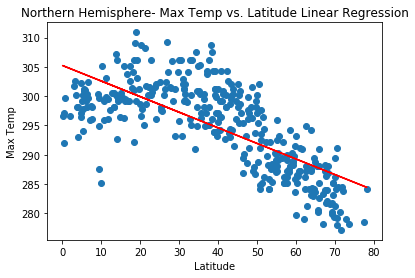

In [85]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

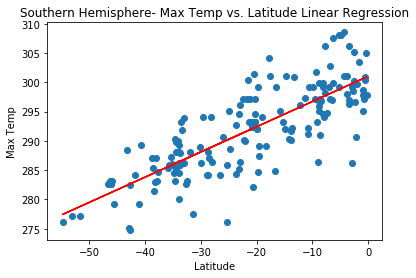

In [86]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

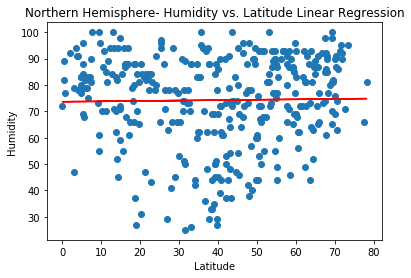

In [87]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Humidity"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

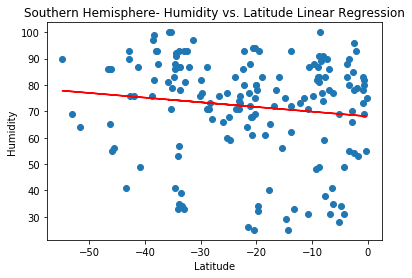

In [88]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Humidity"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Sorthern Hemisphere - Humidity vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

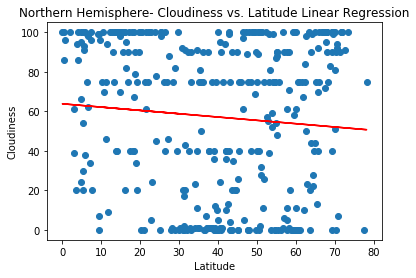

In [89]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Cloudiness"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

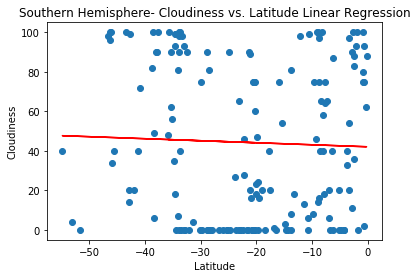

In [90]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Cloudiness"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")
%matplotlib inline

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

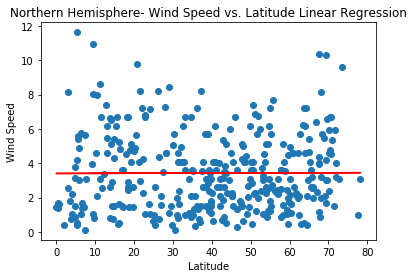

In [91]:
st.linregress(northern_hemisphere["Lat"],northern_hemisphere["Wind Speed"])

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Hemisphere- Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

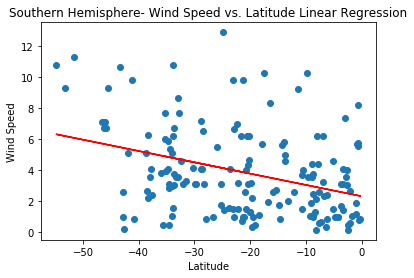

In [92]:
st.linregress(southern_hemisphere["Lat"],southern_hemisphere["Wind Speed"])

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere- Wind Speed vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
%matplotlib inline